In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Diwali.csv')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,False,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,True,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,True,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,False,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,True,Gujarat,Western,Food Processing,Auto,2,23877.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           10000 non-null  int64  
 1   Cust_name         10000 non-null  object 
 2   Product_ID        10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age Group         10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Marital_Status    10000 non-null  bool   
 7   State             10000 non-null  object 
 8   Zone              10000 non-null  object 
 9   Occupation        10000 non-null  object 
 10  Product_Category  10000 non-null  object 
 11  Orders            10000 non-null  int64  
 12  Amount            9988 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 947.4+ KB


In [4]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.000000e+04,10000.000000,10000.000000,9988.000000
mean,1.003005e+06,35.584900,2.486400,10357.103768
std,1.716216e+03,12.809137,1.115231,4823.581725
min,1.000001e+06,12.000000,1.000000,3527.000000
25%,1.001492e+06,27.000000,1.000000,6921.000000
50%,1.003059e+06,33.000000,2.000000,8733.500000
75%,1.004430e+06,43.000000,3.000000,13465.250000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
new_df=df.fillna(df['Amount'].mean())

In [8]:
new_df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
new_df.duplicated().sum()

np.int64(7)

In [10]:
new_df=new_df.drop_duplicates()

In [11]:
new_df.duplicated().sum()

np.int64(0)

In [12]:
new_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,False,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,True,Andhra�Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,True,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,False,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,True,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1002164,McCrossin,P00179442,F,36-45,38,False,Himachal Pradesh,Northern,Retail,Clothing & Apparel,1,3536.0
9996,1001710,Ruben,P00242342,F,18-25,19,True,Uttar Pradesh,Central,Lawyer,Clothing & Apparel,4,3534.0
9997,1002205,Amol,P00204842,M,26-35,32,True,Madhya Pradesh,Central,IT Sector,Clothing & Apparel,2,3533.0
9998,1004001,Delfina,P00009242,M,26-35,29,False,Karnataka,Southern,Automobile,Pet Care,3,3530.0


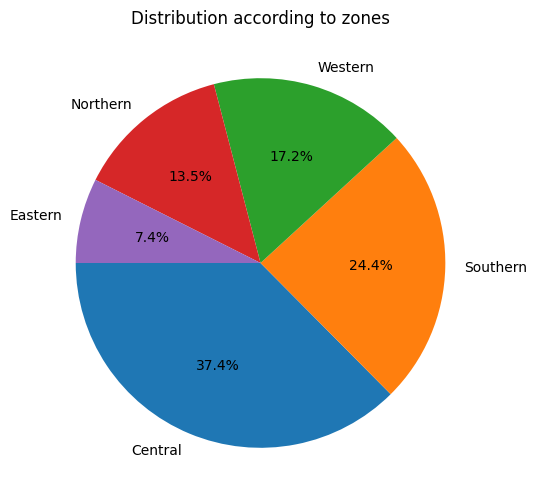

In [13]:
# Zone counts pie chart
zone_count=new_df['Zone'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(zone_count,labels=zone_count.index,startangle=180,autopct='%1.1f%%')
plt.title('Distribution according to zones')
plt.show()

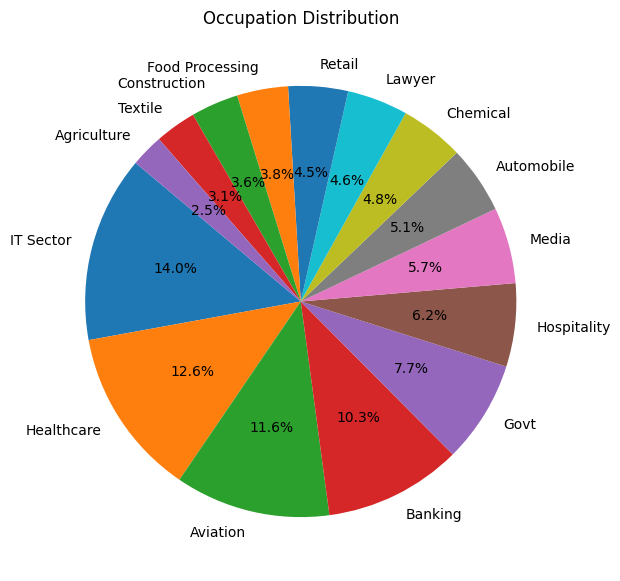

In [14]:
#occupation counts pie chart
occupation_count=new_df['Occupation'].value_counts()
plt.figure(figsize=(10,7))
plt.pie(occupation_count,labels=occupation_count.index,autopct='%1.1f%%',startangle=140)
plt.title("Occupation Distribution")
plt.show()

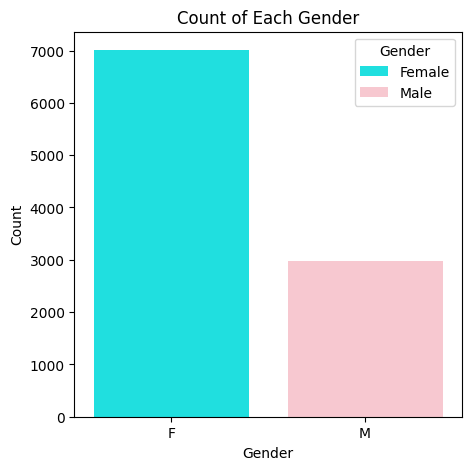

In [15]:
# count of male and female 
plt.figure(figsize=(5,5))
sb.countplot(data=new_df,x='Gender',hue='Gender',palette=['cyan','pink'])
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.show()

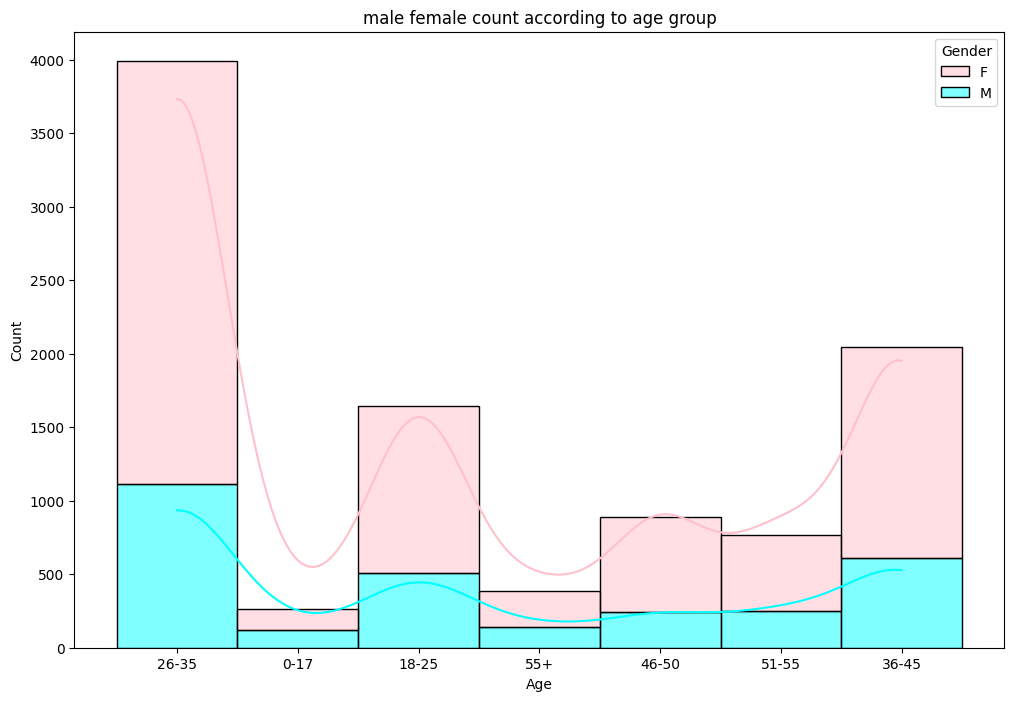

In [17]:
# male female count according to age group
plt.figure(figsize=(12,8))
sb.histplot(data=new_df,x='Age Group',hue='Gender',multiple='stack',bins=10,kde=True,palette=['pink','cyan'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('male female count according to age group')
plt.show()             

In [ ]:
# 